In [153]:
from finlab import utility as fl

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

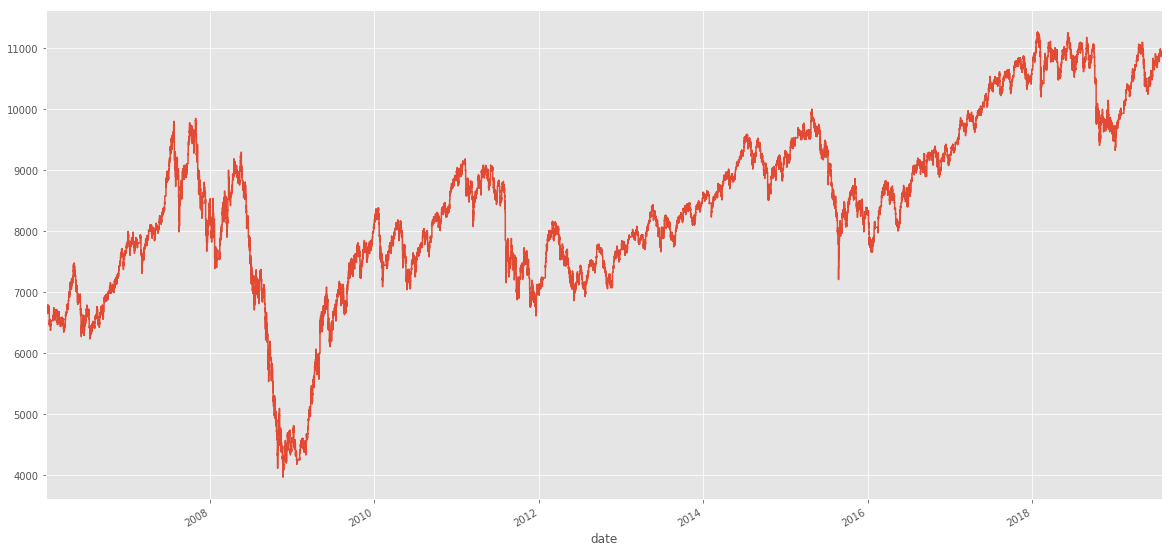

In [154]:
plt.figure(figsize=(20, 10))
twii = fl.get_price(freq='5T')

twii.plot()

In [155]:
features = fl.create_features(twii)
feature_names = features.columns

In [156]:
features.tail()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b6,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5
date,,,,,,,,,,,,,,,,,,,,,
2019-07-29 13:10:00,0.978695,1.000331,1.019505,1.023529,1.024339,1.024728,-27.15,0.053556,-21.638152,-19.360455,...,0.996298,0.998964,0.094132,-0.314115,7.170214,5.789627,4.910241,3.833292,3.908419,3.448346
2019-07-29 13:15:00,0.981384,1.001558,1.020068,1.023935,1.024694,1.025026,-33.54,0.434131,-21.409076,-19.478775,...,0.996499,0.999382,0.129893,-0.300709,7.082112,5.760280,4.908008,3.833491,3.905731,3.448357
2019-07-29 13:20:00,0.984322,1.002897,1.020681,1.024377,1.025081,1.025351,-36.92,0.661601,-21.203606,-19.573556,...,0.996199,1.000098,0.179825,-0.284634,7.008317,5.725599,4.905209,3.833319,3.903034,3.448292
2019-07-29 13:25:00,1.005634,1.012691,1.025186,1.027631,1.027928,1.027741,-22.97,1.170422,-20.894032,-19.637351,...,0.996825,1.001313,0.238365,-0.266672,6.986263,5.686462,4.903692,3.834034,3.900744,3.448408
2019-07-29 13:30:00,0.962740,0.992085,1.015331,1.020454,1.021638,1.022456,-41.26,1.337776,-20.728767,-19.780775,...,0.995170,0.999649,0.259670,-0.256642,6.975354,5.654677,4.900647,3.832709,3.897627,3.447980


In [138]:
from finlab import labels

#trade_label = labels.trade_point_dicision(twii)
trip_bari = labels.triple_barrier(twii, 1.005, 0.995, 10)
trip_bari_label = trip_bari.triple_barrier_signal == 1
continue_trade = labels.continuous_trading_signal(twii, 30)

/Users/yaotechuang/anaconda3/envs/finlab/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [140]:
continue_trade_label = continue_trade > 0.5
# print(continue_trade_label.shape)
# print(trip_bari_label.shape)

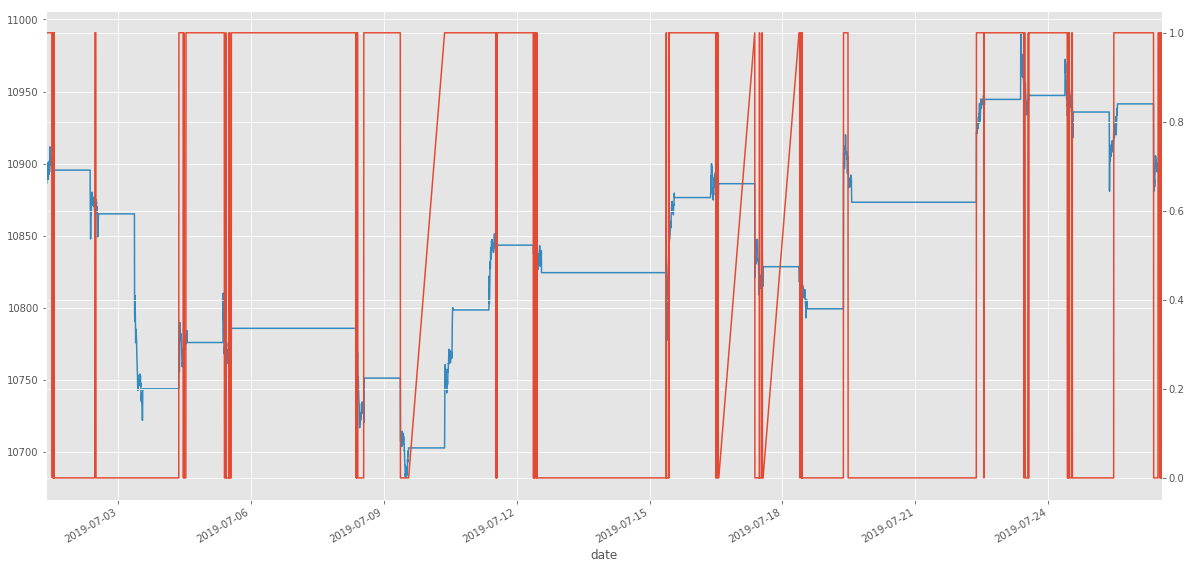

In [144]:
plt.figure(figsize=(20, 10))
# label = trip_bar_label
label = continue_trade_label
label['2019-07'].astype(int).plot(secondary_y=True)
twii['2019-07'].plot()

In [145]:
print(features.shape)
print(label.shape)

(184415, 42)
(184415,)


In [146]:
ss, features_scaled = fl.scale(features)
features_scaled_dropna, label_dropna = fl.dropna(features_scaled, label)

In [147]:
x = features_scaled_dropna[:'2015']
y = label_dropna[:'2015'] == 1

model = fl.neural_network_classifier_fit(x, y)
ey = fl.predict_feature(model, features_scaled_dropna)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________
Train on 107629 samples, validate on 26908 samples
Epoch 1/200
107629/107629 [==============================] - 1s 12us/step - loss: 0.5577 - acc: 0.7042 - val_loss: 0.5072 - val_acc: 0.7662
Epoch 2/200
107629/107629 [==============================] - 0s 3us/step - loss: 0.4450 - acc: 0.7993 - val_loss: 0.4544 - val_acc: 0.8025
Epoch 3/200
107629/107629 [==============================] - 0s 3us/step - loss: 0.4069 - acc: 0.8220 - val_loss: 0.4253 - val_acc: 0.8175
Epoch 4/200
107629/107629 [==============================] - 0s 3us

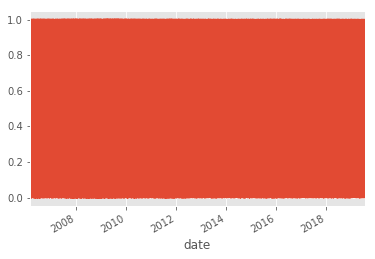

In [148]:
ey.plot()

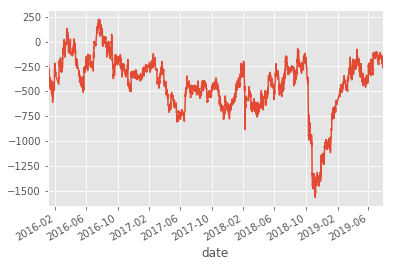

In [149]:
# signal = ey > ey.quantile(0.6)
# returns = twii.shift(-1) - twii
# ret = fl.backtest(signal, returns)
# pd.Series(ret).cumsum().plot()


returns = (twii.shift(-1) - twii)[ey.index & twii.index]
signal = (ey > ey.quantile(0.6)).rolling(10).sum() > 0
returns[signal]['2016':].cumsum().plot()

In [99]:
from fugle_realtime import intraday

apiToken = '32f536e3e8b1e4fd1a712ab1c56f28ea'

intraday.trades(apiToken, symbolId="TWSE_SEM_INDEX_1")

,at,price,serial
0,2019-07-30 01:00:05+00:00,10909.98,2
1,2019-07-30 01:00:10+00:00,10913.50,3
2,2019-07-30 01:00:15+00:00,10916.05,4
3,2019-07-30 01:00:20+00:00,10917.29,5
4,2019-07-30 01:00:25+00:00,10918.13,6
5,2019-07-30 01:00:30+00:00,10919.10,7
6,2019-07-30 01:00:35+00:00,10918.97,8
7,2019-07-30 01:00:40+00:00,10919.12,9
8,2019-07-30 01:00:45+00:00,10919.50,10
9,2019-07-30 01:00:50+00:00,10919.70,11


In [100]:
from finlab.utility import create_features
import pandas as pd

def fugle_realtime(api_token, twii, model, ss, freq="15T", lookback=10000):
    
    from fugle_realtime import intraday
    if twii.index.tzinfo is None:
        twii.index = twii.index.tz_localize("Asia/Taipei")
    
    #df = intraday.chart(apiToken=api_token, output="dataframe", symbolId="TWSE_SEM_INDEX_1")
    df = intraday.trades(apiToken=api_token, output="dataframe", symbolId="TWSE_SEM_INDEX_1")
    df.index = df['at']
    df.index = df.index.tz_convert("Asia/Taipei")
    df = df.resample(freq).last()

    twii_temp = twii.append(df.price).iloc[-lookback:]
    features = create_features(twii_temp).dropna()
    
    if len(features) == 0:
        print("fail! please increase lookback period")

    y = model.predict(ss.transform(features))
    return pd.DataFrame({'twii':twii_temp.loc[features.index].values, 
                         'model': y.reshape(1, len(y))[0]}, index=features.index)

,twii,model
2019-07-29 13:10:00+08:00,10893.33,0.870045
2019-07-29 13:15:00+08:00,10894.45,0.883855
2019-07-29 13:20:00+08:00,10895.67,0.879783
2019-07-29 13:25:00+08:00,10904.66,0.945799
2019-07-29 13:30:00+08:00,10885.73,0.649227
2019-07-31 09:00:00+08:00,10803.60,0.000044
2019-07-31 09:15:00+08:00,10806.23,0.000071
2019-07-31 09:30:00+08:00,10814.21,0.000182
2019-07-31 09:45:00+08:00,10806.13,0.000083
2019-07-31 10:00:00+08:00,10776.29,0.000005


<Figure size 1440x720 with 0 Axes>

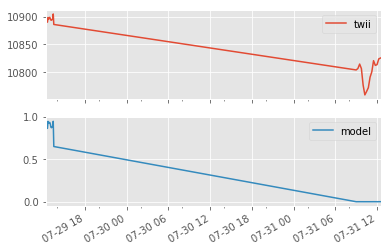

In [161]:
y = fugle_realtime(apiToken, twii=twii, model=model, ss=ss, freq='15T')
plt.figure(figsize=(20, 10))
y.iloc[-30:].plot(subplots=True, grid=True)

y.tail(20)